### predict the chances for a goal in the next minute

In [55]:
# cd 

In [56]:
# to do:
# check anomaly detection model; how does it work and can it work here?
# what are the conclusions? seperate and define how each sampling and/or model works (# read smoteENN functioning)

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsbombpy import sb
import notebooks.utils as utils
import SoccermaticsForPython.FCPython as sfp_fcp
import SoccermaticsForPython as sfp
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier


#### import dataset

In [60]:
df = pd.read_csv('data/train_dataset.csv', index_col=0)
df.set_index('uniekid', inplace=True)

In [61]:
df.head(1)

,goal,competition_stage_Final,competition_stage_Group Stage,competition_stage_Quarter-finals,competition_stage_Round of 16,competition_stage_Semi-finals,under_pressure,aanvallende_helft,aanvallend_kwart,in_de_16,possession_team_Austria,possession_team_Belgium,possession_team_Croatia,possession_team_Czech Republic,possession_team_Denmark,possession_team_England,possession_team_Finland,possession_team_France,possession_team_Germany,possession_team_Hungary,possession_team_Italy,possession_team_Netherlands,possession_team_North Macedonia,possession_team_Poland,possession_team_Portugal,possession_team_Russia,possession_team_Scotland,possession_team_Slovakia,possession_team_Spain,possession_team_Sweden,possession_team_Switzerland,possession_team_Turkey,possession_team_Ukraine,possession_team_Wales,player_Aaron Ramsey,player_Adam Hložek,player_Adama Traoré Diarra,player_Admir Mehmedi,player_Adrien Rabiot,player_Albin Ekdal,player_Aleksandar Dragović,player_Aleksandar Trajkovski,player_Aleksandr Golovin,player_Aleksandr Sobolev,player_Aleksey Miranchuk,player_Alessandro Bastoni,player_Alessandro Florenzi,player_Alessandro Schöpf,player_Alex Král,player_Alexander Isak,player_Andrea Belotti,player_Andreas Christensen,player_Andreas Evald Cornelius,player_Andreas Skov Olsen,player_Andreas Ulmer,player_Andrej Kramarić,player_Andrew Robertson,player_Andrey Semenov,player_Andriy Yarmolenko,player_András Schäfer,player_André Miguel Valente Silva,player_Anga Dedryck Boyata,player_Ante Budimir,player_Ante Rebić,player_Antoine Griezmann,player_Anton Shunin,player_Antonio Rüdiger,player_Antonín Barák,player_Arijan Ademi,player_Artem Besedin,player_Artem Dovbyk,player_Artem Dzyuba,player_Attila Fiola,player_Attila Szalai,player_Axel Witsel,player_Aymeric Laporte,player_Bartosz Bereszyński,player_Ben Davies,player_Benjamin Pavard,player_Bernardo Mota Veiga de Carvalho e Silva,player_Billy Gilmour,player_Boban Nikolov,player_Borna Barišić,player_Breel-Donald Embolo,player_Bruno Miguel Borges Fernandes,player_Bruno Petković,player_Bryan Cristante,player_Bukayo Saka,player_Burak Yılmaz,player_Caglar Söyüncü,player_Callum William McGregor,player_Cengiz Umut Meraş,player_Cengiz Ünder,player_Che Adams,player_Chris Gunter,player_Christian Benteke Liolo,player_Christian Dannemann Eriksen,player_Christian Fassnacht,player_Christian Nørgaard,player_Christoph Baumgartner,player_Christopher James Mepham,player_Christopher Trimmel,player_Ciro Immobile,player_Clément Lenglet,player_Cody Mathès Gakpo,player_Connor Roberts,player_Corentin Tolisso,player_Cristiano Ronaldo dos Santos Aveiro,player_César Azpilicueta Tanco,player_Daler Kuzyaev,player_Daley Blind,player_Daniel Avramovski,player_Daniel Bachmann,player_Daniel James,"player_Daniel O""Shaughnessy",player_Daniel Olmo Carvajal,player_Daniel Wass,player_Danilo Luís Hélio Pereira,player_Danny Ward,player_Darko Churlinov,player_Darko Velkovski,player_David Brooks,player_David Marshall,player_David Olatukunbo Alaba,player_David Siger,player_Declan Rice,player_Dejan Kulusevski,player_Dejan Lovren,player_Denis Cheryshev,player_Denis Lemi Zakaria Lako Lado,player_Dennis Praet,player_Denzel Dumfries,player_Diogo José Teixeira da Silva,player_Djibril Sow,player_Dmitriy Barinov,player_Domagoj Vida,player_Domenico Berardi,player_Dominic Calvert-Lewin,player_Dominik Livaković,player_Donyell Malen,player_Dorukhan Toköz,player_Dries Mertens,player_Duje Ćaleta-Car,player_Dylan Levitt,player_Dávid Hancko,player_Eden Hazard,player_Eduard Sobol,player_Egzon Bejtulai,player_Eljif Elmas,player_Emerson Palmieri dos Santos,player_Emil Krafth,player_Emil Peter Forsberg,player_Emre Can,player_Endre Botka,player_Enis Bardhi,player_Eric García Martret,player_Ethan Ampadu,player_Evgeny Makarenko,player_Ezgjan Alioski,player_Fabian Lukas Schär,player_Fabián Ruiz Peña,player_Federico Bernardeschi,player_Federico Chiesa,player_Fedor Kudryashov,player_Ferhan Hasani,player_Ferrán Torres García,player_Filip Helander,player_Florian Grillits

#### create train and testset

In [62]:
# algemene train en testset
X = df.drop('goal', axis=1)
y = df['goal']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [63]:
y_test.value_counts(normalize=True)

0.0    0.982977
1.0    0.017023
Name: goal, dtype: float64

In [64]:
# verschillende balaning technieken testen met verschillende strategy's

In [65]:
# strategies = np.linspace(0,1,10)    #1 = 50/50 distribution between 0 and 1 class, 0.5 = 66 (0) and 33 (1) distribution
# strategy = 0.25
# strategy = 0.5
# strategy = 0.75
strategy = 0.85
# strategy = 1

In [66]:
rus = RandomUnderSampler(random_state=0,sampling_strategy=strategy)    # remove 0 class
ros = RandomOverSampler(random_state =0, sampling_strategy=strategy)   # add copies 1 class
smote = SMOTE(random_state =0,sampling_strategy=strategy)              # add synthetic 1 class
sme = SMOTEENN(random_state=0, sampling_strategy=strategy)             # https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smoteENN, y_train_smoteENN = sme.fit_resample(X_train, y_train)

In [67]:
y_train_rus.value_counts(normalize=True)  

0.0    0.539095
1.0    0.460905
Name: goal, dtype: float64

In [68]:
y_train_ros.value_counts(normalize=True)  

0.0    0.54055
1.0    0.45945
Name: goal, dtype: float64

In [69]:
y_train_smote.value_counts(normalize=True)

0.0    0.54055
1.0    0.45945
Name: goal, dtype: float64

In [70]:
y_train_smoteENN.value_counts(normalize=True)  

1.0    0.540386
0.0    0.459614
Name: goal, dtype: float64

In [71]:
X_train_tot = [X_train, X_train_rus, X_train_ros, X_train_smote,X_train_smoteENN]
y_train_tot = [y_train, y_train_rus, y_train_ros, y_train_smote, y_train_smoteENN]
sampling_technique = ['nothing', 'undersampling' ,'oversampling' , 'smote' , 'smoteENN']

#### create model

In [48]:
models = []

models.append(("LogisticRegression",LogisticRegression(random_state=42)))
models.append(("SVC",SVC(random_state=42)))
# models.append(("LinearSVC",LinearSVC(random_state=42)))
models.append(("RandomForest",RandomForestClassifier(random_state=42)))
models.append(("BalancedBagging", BalancedBaggingClassifier(random_state=42)))
models.append(("BalancedRandom", BalancedRandomForestClassifier(max_depth=2, random_state=42)))

volgende ronde met een bepaalde sampling technique: nothing:
LogisticRegression
[0.97505938 0.97743468 0.97425743]
with the following confusion matrix: 


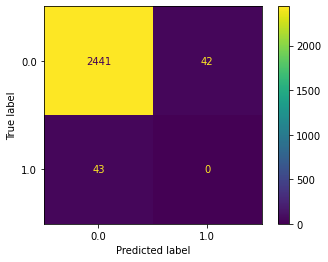

volgende ronde met een bepaalde sampling technique: undersampling:
LogisticRegression
[0.45679012 0.55555556 0.54320988]
with the following confusion matrix: 


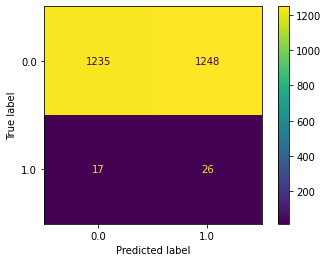

volgende ronde met een bepaalde sampling technique: oversampling:
LogisticRegression
[0.88097307 0.8865957  0.87812296]
with the following confusion matrix: 


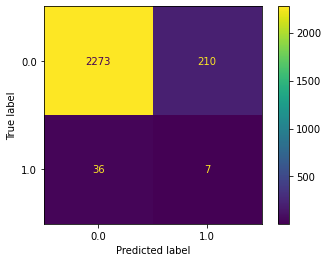

volgende ronde met een bepaalde sampling technique: smote:
LogisticRegression
[0.87858384 0.88203346 0.87573322]
with the following confusion matrix: 


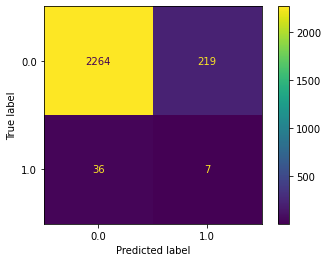

volgende ronde met een bepaalde sampling technique: smoteENN:
LogisticRegression
[0.96991736 0.97322314 0.97454545]
with the following confusion matrix: 


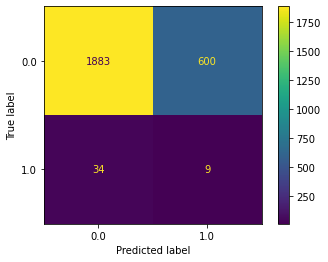

volgende ronde met een bepaalde sampling technique: nothing:
SVC
[0.98535234 0.98495645 0.98534653]
with the following confusion matrix: 


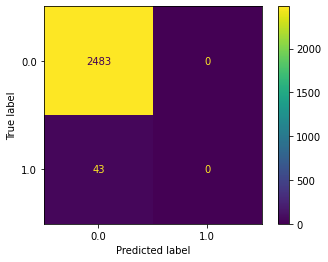

volgende ronde met een bepaalde sampling technique: undersampling:
SVC
[0.50617284 0.5308642  0.5308642 ]
with the following confusion matrix: 


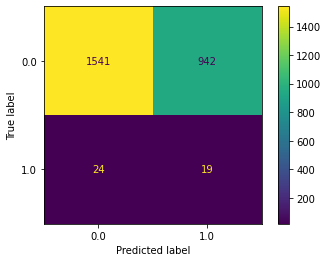

volgende ronde met een bepaalde sampling technique: oversampling:
SVC
[0.9016073  0.90028242 0.89224419]
with the following confusion matrix: 


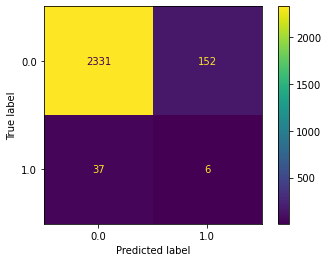

volgende ronde met een bepaalde sampling technique: smote:
SVC
[0.88683753 0.87442972 0.88246796]
with the following confusion matrix: 


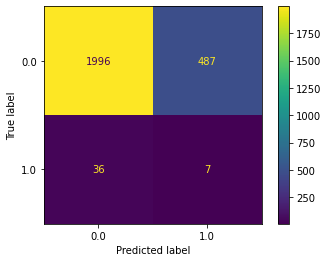

volgende ronde met een bepaalde sampling technique: smoteENN:
SVC
[0.9768595  0.96727273 0.9861157 ]
with the following confusion matrix: 


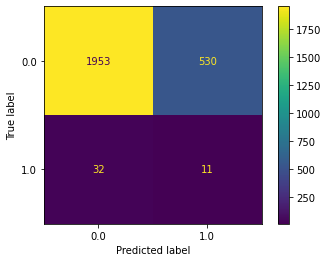

volgende ronde met een bepaalde sampling technique: nothing:
RandomForest
[0.98535234 0.98495645 0.98534653]
with the following confusion matrix: 


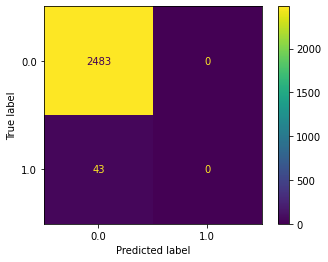

volgende ronde met een bepaalde sampling technique: undersampling:
RandomForest
[0.60493827 0.50617284 0.49382716]
with the following confusion matrix: 


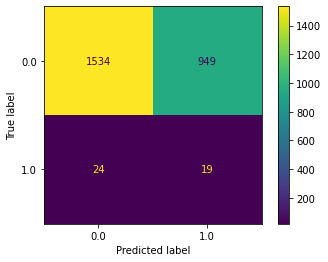

volgende ronde met een bepaalde sampling technique: oversampling:
RandomForest
[0.90595135 0.90614816 0.89876168]
with the following confusion matrix: 


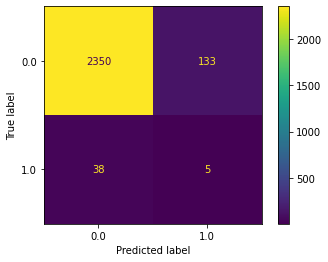

volgende ronde met een bepaalde sampling technique: smote:
RandomForest
[0.89617724 0.91657615 0.91071041]
with the following confusion matrix: 


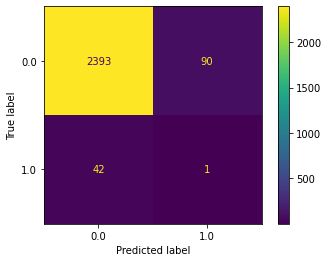

volgende ronde met een bepaalde sampling technique: smoteENN:
RandomForest
[0.97652893 1.         1.        ]
with the following confusion matrix: 


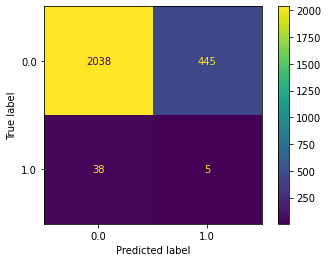

volgende ronde met een bepaalde sampling technique: nothing:
BalancedBagging
[0.82343626 0.61916073 0.62970297]
with the following confusion matrix: 


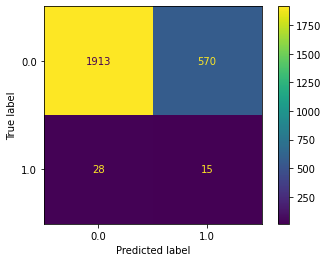

volgende ronde met een bepaalde sampling technique: undersampling:
BalancedBagging
[0.59259259 0.49382716 0.5308642 ]
with the following confusion matrix: 


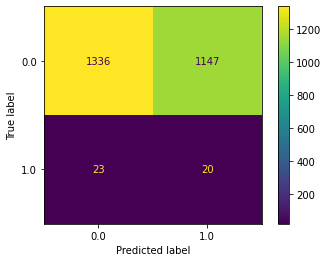

volgende ronde met een bepaalde sampling technique: oversampling:
BalancedBagging
[0.9018245  0.90245492 0.89289594]
with the following confusion matrix: 


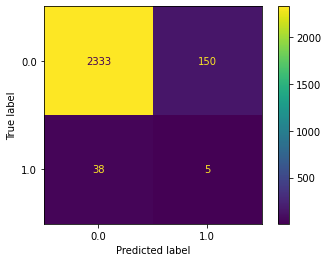

volgende ronde met een bepaalde sampling technique: smote:
BalancedBagging
[0.89617724 0.91223115 0.90875516]
with the following confusion matrix: 


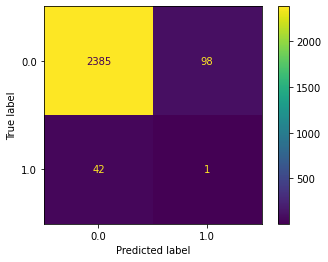

volgende ronde met een bepaalde sampling technique: smoteENN:
BalancedBagging
[0.97355372 0.99867769 0.99735537]
with the following confusion matrix: 


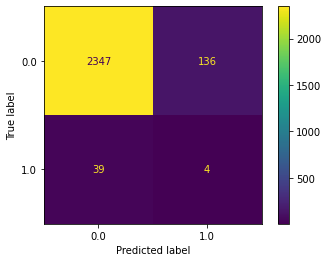

volgende ronde met een bepaalde sampling technique: nothing:
BalancedRandom
[0.29889153 0.2810768  0.30217822]
with the following confusion matrix: 


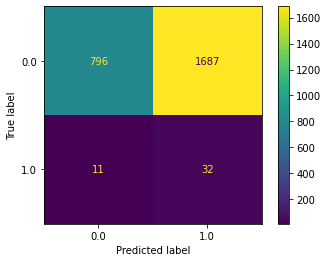

volgende ronde met een bepaalde sampling technique: undersampling:
BalancedRandom
[0.4691358  0.50617284 0.45679012]
with the following confusion matrix: 


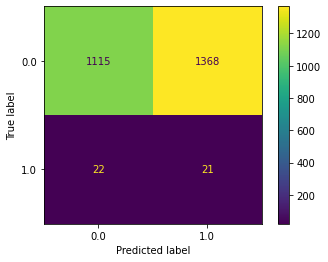

volgende ronde met een bepaalde sampling technique: oversampling:
BalancedRandom
[0.6874457  0.67868781 0.67238757]
with the following confusion matrix: 


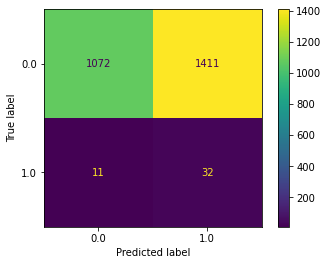

volgende ronde met een bepaalde sampling technique: smote:
BalancedRandom
[0.75412685 0.73473821 0.74321095]
with the following confusion matrix: 


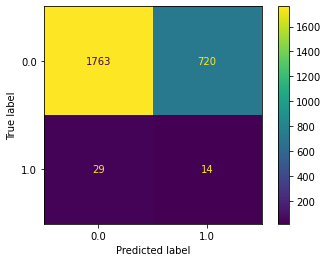

volgende ronde met een bepaalde sampling technique: smoteENN:
BalancedRandom
[0.82214876 0.82710744 0.84429752]
with the following confusion matrix: 


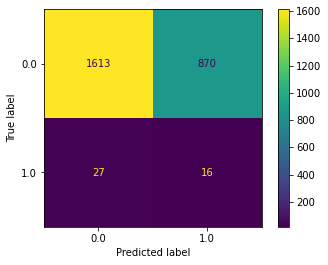

In [49]:
#sampling 0.85
results = []
techniques = []
names = []
train = []

for name, model in models:
    for technique, x, y in zip(sampling_technique, X_train_tot, y_train_tot):
        mod = make_pipeline(StandardScaler(), model)
        result = cross_val_score(mod, x, y,  cv=3)
        mod.fit(x, y)            
        names.append(name)
        results.append(result)
        techniques.append(technique)
        print(f'volgende ronde met een bepaalde sampling technique: {technique}:')
        print(name)
        print(result)
        print('with the following confusion matrix: ')
        plot_confusion_matrix(mod, X_test, y_test)  
        plt.show()

volgende ronde met een bepaalde sampling technique: nothing:
LogisticRegression
[0.97505938 0.97743468 0.97425743]
with the following confusion matrix: 


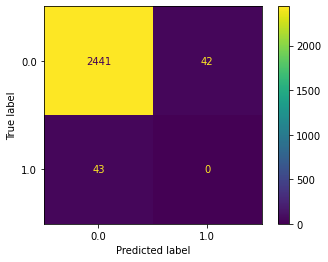

volgende ronde met een bepaalde sampling technique: undersampling:
LogisticRegression
[0.50666667 0.50666667 0.5       ]
with the following confusion matrix: 


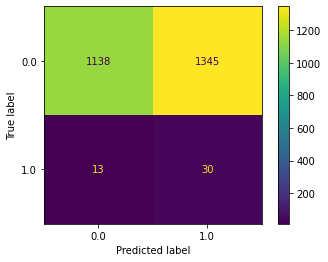

volgende ronde met een bepaalde sampling technique: oversampling:
LogisticRegression
[0.88205746 0.88507133 0.86796624]
with the following confusion matrix: 


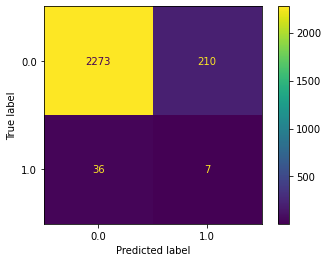

volgende ronde met een bepaalde sampling technique: smote:
LogisticRegression
[0.87542696 0.87281495 0.87258842]
with the following confusion matrix: 


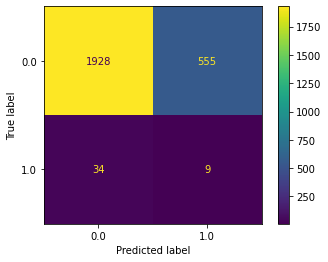

volgende ronde met een bepaalde sampling technique: smoteENN:
LogisticRegression
[0.97213534 0.97782201 0.97753767]
with the following confusion matrix: 


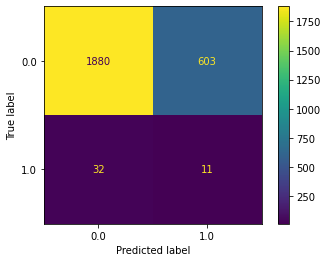

volgende ronde met een bepaalde sampling technique: nothing:
SVC
[0.98535234 0.98495645 0.98534653]
with the following confusion matrix: 


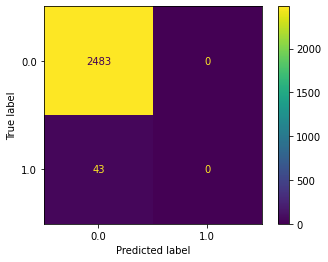

volgende ronde met een bepaalde sampling technique: undersampling:
SVC
[0.54666667 0.61333333 0.54054054]
with the following confusion matrix: 


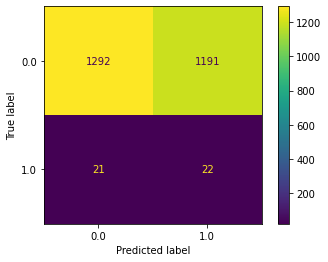

volgende ronde met een bepaalde sampling technique: oversampling:
SVC
[0.90114527 0.88386578 0.88223473]
with the following confusion matrix: 


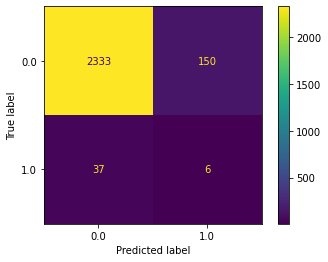

volgende ronde met een bepaalde sampling technique: smote:
SVC
[0.89531846 0.88446856 0.88605305]
with the following confusion matrix: 


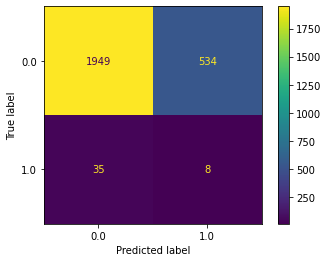

volgende ronde met een bepaalde sampling technique: smoteENN:
SVC
[0.97952801 0.97241968 0.97725334]
with the following confusion matrix: 


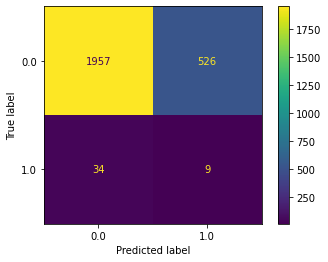

volgende ronde met een bepaalde sampling technique: nothing:
RandomForest
[0.98535234 0.98495645 0.98534653]
with the following confusion matrix: 


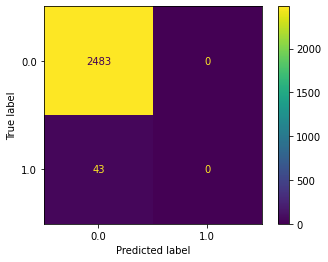

volgende ronde met een bepaalde sampling technique: undersampling:
RandomForest
[0.52       0.50666667 0.51351351]
with the following confusion matrix: 


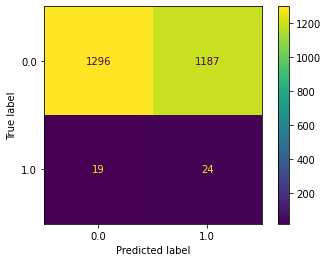

volgende ronde met een bepaalde sampling technique: oversampling:
RandomForest
[0.90516375 0.90255174 0.88826367]
with the following confusion matrix: 


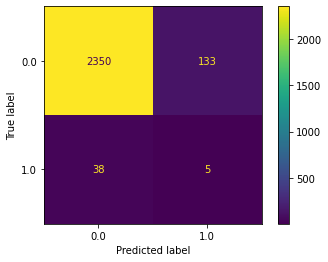

volgende ronde met een bepaalde sampling technique: smote:
RandomForest
[0.89290737 0.91561181 0.9017283 ]
with the following confusion matrix: 


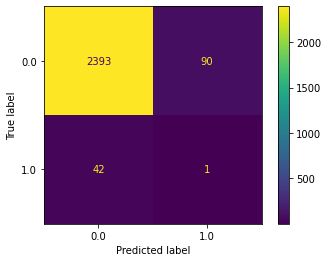

volgende ronde met een bepaalde sampling technique: smoteENN:
RandomForest
[0.97952801 1.         1.        ]
with the following confusion matrix: 


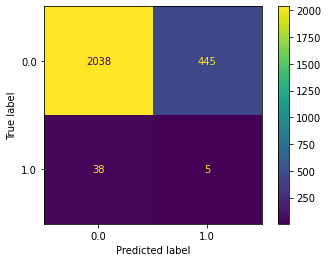

volgende ronde met een bepaalde sampling technique: nothing:
BalancedBagging
[0.82343626 0.61916073 0.62970297]
with the following confusion matrix: 


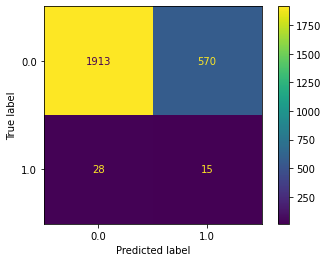

volgende ronde met een bepaalde sampling technique: undersampling:
BalancedBagging
[0.50666667 0.48       0.40540541]
with the following confusion matrix: 


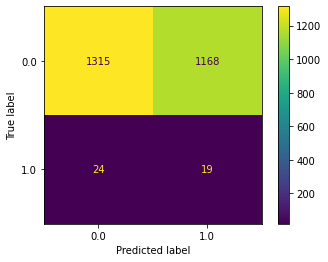

volgende ronde met een bepaalde sampling technique: oversampling:
BalancedBagging
[0.90255174 0.89933695 0.8818328 ]
with the following confusion matrix: 


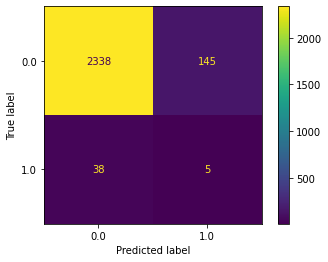

volgende ronde met een bepaalde sampling technique: smote:
BalancedBagging
[0.893912   0.9138035  0.90052251]
with the following confusion matrix: 


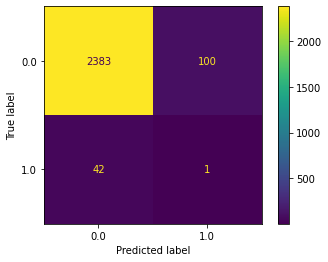

volgende ronde met een bepaalde sampling technique: smoteENN:
BalancedBagging
[0.97924367 0.99857833 0.99687233]
with the following confusion matrix: 


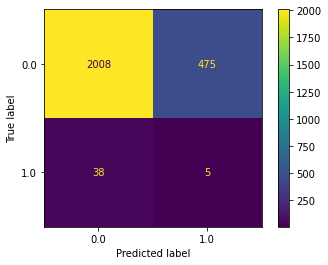

volgende ronde met een bepaalde sampling technique: nothing:
BalancedRandom
[0.29889153 0.2810768  0.30217822]
with the following confusion matrix: 


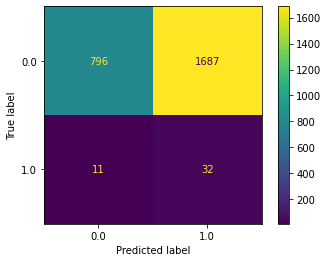

volgende ronde met een bepaalde sampling technique: undersampling:
BalancedRandom
[0.54666667 0.50666667 0.48648649]
with the following confusion matrix: 


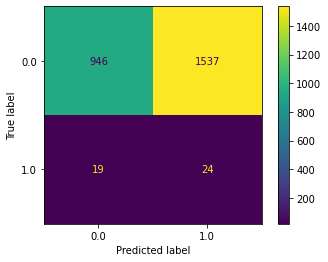

volgende ronde met een bepaalde sampling technique: oversampling:
BalancedRandom
[0.70102471 0.71046815 0.69815113]
with the following confusion matrix: 


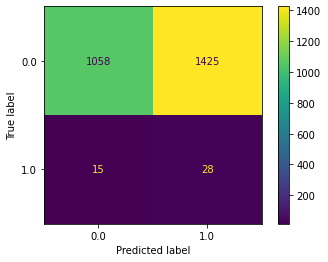

volgende ronde met een bepaalde sampling technique: smote:
BalancedRandom
[0.74663452 0.72935503 0.7562299 ]
with the following confusion matrix: 


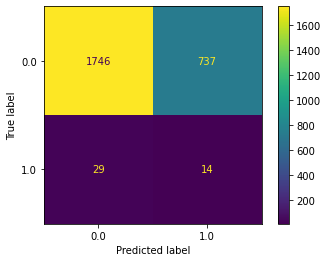

volgende ronde met een bepaalde sampling technique: smoteENN:
BalancedRandom
[0.8117714  0.81319306 0.83110606]
with the following confusion matrix: 


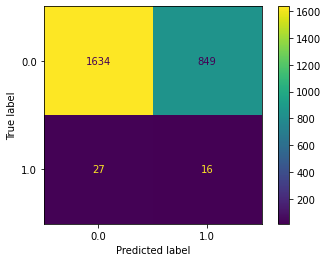

In [40]:
#sampling 1.0
results = []
techniques = []
names = []
train = []

for name, model in models:
    for technique, x, y in zip(sampling_technique, X_train_tot, y_train_tot):
        mod = make_pipeline(StandardScaler(), model)
        result = cross_val_score(mod, x, y,  cv=3)
        mod.fit(x, y)            
        names.append(name)
        results.append(result)
        techniques.append(technique)
        print(f'volgende ronde met een bepaalde sampling technique: {technique}:')
        print(name)
        print(result)
        print('with the following confusion matrix: ')
        plot_confusion_matrix(mod, X_test, y_test)  
        plt.show()

volgende ronde met een bepaalde sampling technique: nothing:
LogisticRegression
[0.97505938 0.97743468 0.97425743]
with the following confusion matrix: 


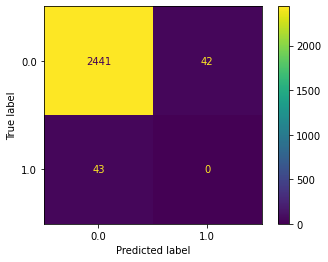

volgende ronde met een bepaalde sampling technique: undersampling:
LogisticRegression
[0.625      0.59821429 0.53571429]
with the following confusion matrix: 


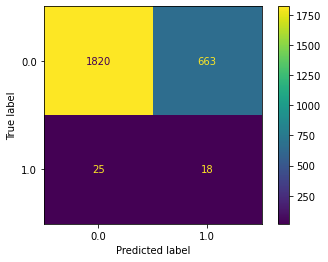

volgende ronde met een bepaalde sampling technique: oversampling:
LogisticRegression
[0.88534691 0.88531618 0.88504823]
with the following confusion matrix: 


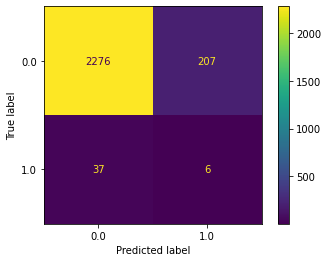

volgende ronde met een bepaalde sampling technique: smote:
LogisticRegression
[0.88159657 0.88049303 0.88370847]
with the following confusion matrix: 


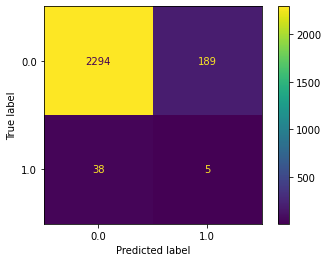

volgende ronde met een bepaalde sampling technique: smoteENN:
LogisticRegression
[0.96889258 0.97511406 0.97677312]
with the following confusion matrix: 


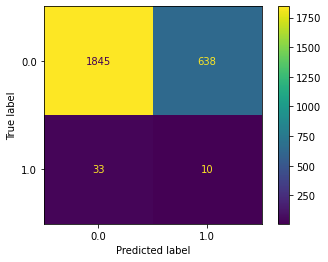

volgende ronde met een bepaalde sampling technique: nothing:
SVC
[0.98535234 0.98495645 0.98534653]
with the following confusion matrix: 


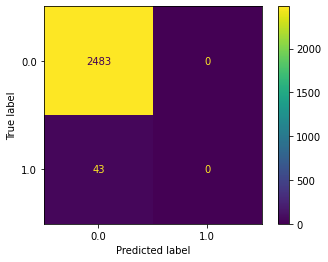

volgende ronde met een bepaalde sampling technique: undersampling:
SVC
[0.66964286 0.66071429 0.66071429]
with the following confusion matrix: 


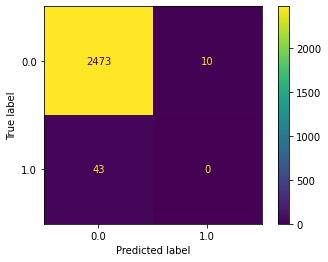

volgende ronde met een bepaalde sampling technique: oversampling:
SVC
[0.90865256 0.90755627 0.91371919]
with the following confusion matrix: 


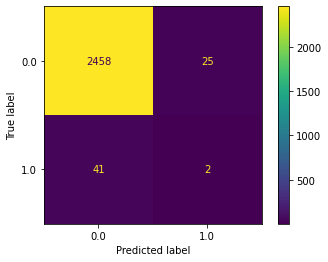

volgende ronde met een bepaalde sampling technique: smote:
SVC
[0.90275917 0.89255091 0.89067524]
with the following confusion matrix: 


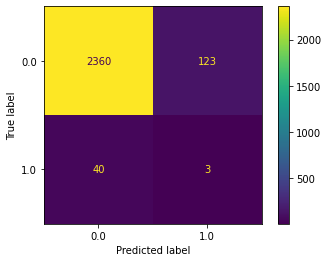

volgende ronde met een bepaalde sampling technique: smoteENN:
SVC
[0.99294898 0.99170469 0.98838656]
with the following confusion matrix: 


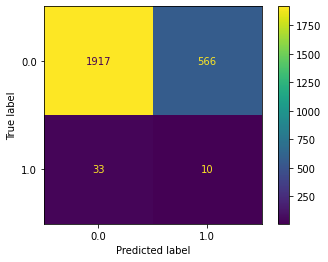

volgende ronde met een bepaalde sampling technique: nothing:
RandomForest
[0.98535234 0.98495645 0.98534653]
with the following confusion matrix: 


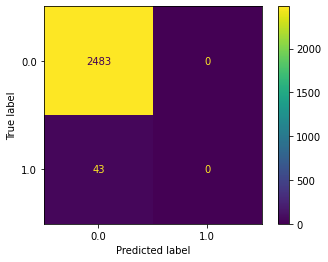

volgende ronde met een bepaalde sampling technique: undersampling:
RandomForest
[0.67857143 0.64285714 0.60714286]
with the following confusion matrix: 


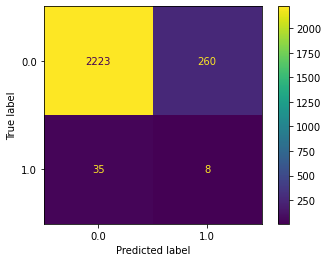

volgende ronde met een bepaalde sampling technique: oversampling:
RandomForest
[0.91481382 0.90943194 0.90916399]
with the following confusion matrix: 


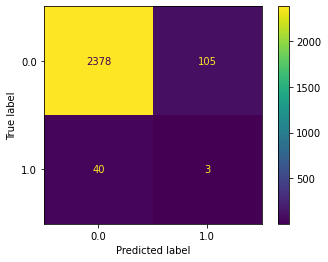

volgende ronde met een bepaalde sampling technique: smote:
RandomForest
[0.89900884 0.9244373  0.92416935]
with the following confusion matrix: 


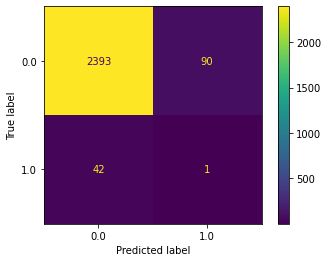

volgende ronde met een bepaalde sampling technique: smoteENN:
RandomForest
[0.97138117 1.         1.        ]
with the following confusion matrix: 


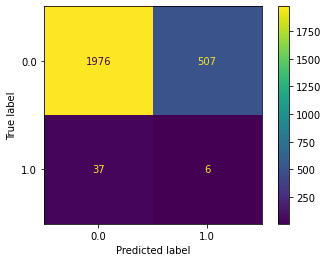

volgende ronde met een bepaalde sampling technique: nothing:
bagging
[0.82343626 0.61916073 0.62970297]
with the following confusion matrix: 


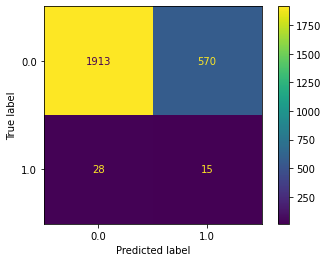

volgende ronde met een bepaalde sampling technique: undersampling:
bagging
[0.61607143 0.55357143 0.60714286]
with the following confusion matrix: 


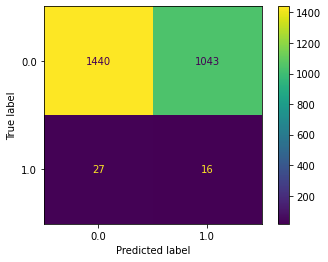

volgende ronde met een bepaalde sampling technique: oversampling:
bagging
[0.91561747 0.90541265 0.90434084]
with the following confusion matrix: 


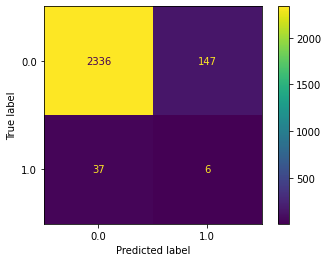

volgende ronde met een bepaalde sampling technique: smote:
bagging
[0.90704527 0.92095391 0.92282958]
with the following confusion matrix: 


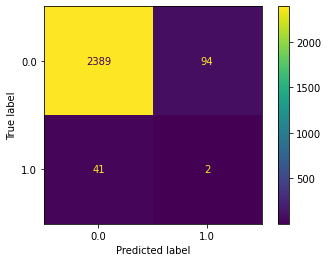

volgende ronde met een bepaalde sampling technique: smoteENN:
bagging
[0.96847781 0.99792617 0.99709664]
with the following confusion matrix: 


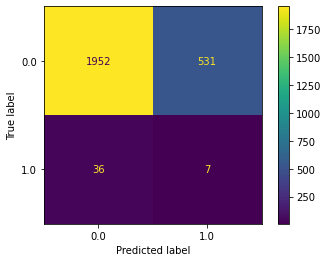

volgende ronde met een bepaalde sampling technique: nothing:
bagging
[0.29889153 0.2810768  0.30217822]
with the following confusion matrix: 


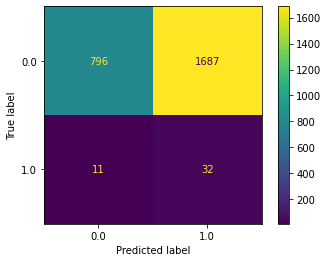

volgende ronde met een bepaalde sampling technique: undersampling:
bagging
[0.5        0.51785714 0.48214286]
with the following confusion matrix: 


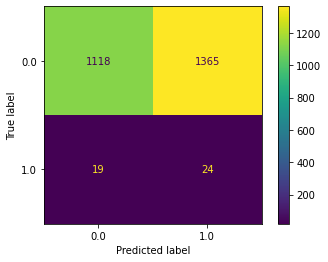

volgende ronde met een bepaalde sampling technique: oversampling:
bagging
[0.62710956 0.62513398 0.62031083]
with the following confusion matrix: 


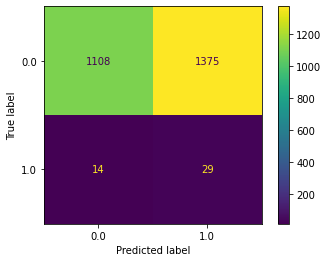

volgende ronde met een bepaalde sampling technique: smote:
bagging
[0.74497723 0.72534834 0.73258307]
with the following confusion matrix: 


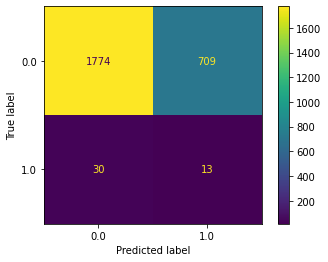

volgende ronde met een bepaalde sampling technique: smoteENN:
bagging
[0.82787225 0.83326421 0.83616757]
with the following confusion matrix: 


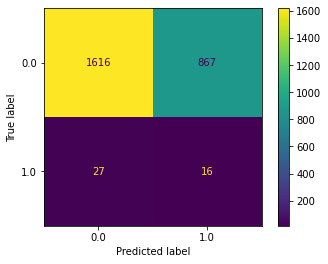

In [19]:
#sampling 0.5
results = []
techniques = []
names = []
train = []

for name, model in models:
    for technique, x, y in zip(sampling_technique, X_train_tot, y_train_tot):
        mod = make_pipeline(StandardScaler(), model)
        result = cross_val_score(mod, x, y,  cv=3)
        mod.fit(x, y)            
        names.append(name)
        results.append(result)
        techniques.append(technique)
        print(f'volgende ronde met een bepaalde sampling technique: {technique}:')
        print(name)
        print(result)
        print('with the following confusion matrix: ')
        plot_confusion_matrix(mod, X_test, y_test)  
        plt.show()

In [22]:
# for i in range(len(names)):
#     print(names[i],results[i].mean(), techniques[i])

In [35]:
# one class classifier

In [20]:
# utils.evaluate_model('Forest', model_full_sample, X_test, y_test)

# # rfc_single_disp = plot_roc_curve(model1, X_test, y_test)
# rfc_disp = plot_roc_curve(model_full_sample, X_test, y_test, ax=rfc_single_disp.ax_)
# rfc_disp.figure_.suptitle("ROC curve comparison")
# plt.show()